In [2]:
### Importing the liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import pandas as pd
# import os
# import numpy as np

# # List of CSV files (update with your file paths)
# csv_files = ["file1.csv", "file2.csv", "file3.csv","file4.csv","file5.csv","file6.csv","file7.csv","file8.csv","file9.csv",
#             "file10.csv","file11.csv","file12.csv","file13.csv","file14.csv","file15.csv","file16.csv",]

# # Initialize an empty list to store DataFrames
# dataframes = []

# # Loop over the list of CSV files and read each into a DataFrame
# for file in csv_files:
#     df = pd.read_csv(file)
    
#     # Replace "-" with NaN
#     df.replace("-", np.nan, inplace=True)
    
#     # Append the DataFrame to the list
#     dataframes.append(df)

# # Concatenate all DataFrames into a single DataFrame
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Save the combined DataFrame to a new CSV file
# combined_df.to_csv("combined_output.csv", index=False)

In [4]:
df = pd.read_csv(r'combined_output.csv')
df.head()

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,2019.12.14_10.16.30,-8.388186,51.935604,0,B,12,5G,-99,-15.0,6.0,...,NaN,NaN,NaN,NaN,C,A81B,9CBA,11016972,-100.0,-15.0
1,2019.12.14_10.16.31,-8.388470,51.935739,1,B,12,5G,-99,-15.0,6.0,...,NaN,NaN,NaN,NaN,C,A81B,9CBA,11016972,-100.0,-15.0
2,2019.12.14_10.16.31,-8.388470,51.935739,1,B,12,5G,-99,-15.0,6.0,...,NaN,NaN,NaN,NaN,C,A81B,9CBA,11016972,-100.0,-15.0
3,2019.12.14_10.16.32,-8.388470,51.935739,1,B,12,5G,-102,-14.0,6.0,...,NaN,NaN,NaN,NaN,C,A81B,9CBA,11016972,-99.0,-15.0
4,2019.12.14_10.16.33,-8.388470,51.935739,1,B,12,5G,-102,-14.0,6.0,...,NaN,NaN,NaN,NaN,C,A81B,9CBA,11016972,-99.0,-15.0


In [5]:
### here we check the shape of dataset rows and columns
df.shape

(27591, 26)

In [6]:
### here we are checking the null values
df.isna().sum()

Timestamp           0
Longitude           0
Latitude            0
Speed               0
Operatorname        0
CellID              0
NetworkMode         0
RSRP                0
RSRQ             3402
SNR              4428
CQI              4429
RSSI             5038
DL_bitrate          0
UL_bitrate          0
State               0
PINGAVG         25605
PINGMIN         25605
PINGMAX         25605
PINGSTDEV       25605
PINGLOSS        25557
CELLHEX             0
NODEHEX             0
LACHEX              0
RAWCELLID           0
NRxRSRP          4047
NRxRSRQ          6711
dtype: int64

In [7]:
### Above we can see there is 11 columns having the null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     27591 non-null  object 
 1   Longitude     27591 non-null  float64
 2   Latitude      27591 non-null  float64
 3   Speed         27591 non-null  int64  
 4   Operatorname  27591 non-null  object 
 5   CellID        27591 non-null  int64  
 6   NetworkMode   27591 non-null  object 
 7   RSRP          27591 non-null  int64  
 8   RSRQ          24189 non-null  float64
 9   SNR           23163 non-null  float64
 10  CQI           23162 non-null  float64
 11  RSSI          22553 non-null  float64
 12  DL_bitrate    27591 non-null  int64  
 13  UL_bitrate    27591 non-null  int64  
 14  State         27591 non-null  object 
 15  PINGAVG       1986 non-null   float64
 16  PINGMIN       1986 non-null   float64
 17  PINGMAX       1986 non-null   float64
 18  PINGSTDEV     1986 non-nul

# **Exploratory Data Analysis (EDA)**

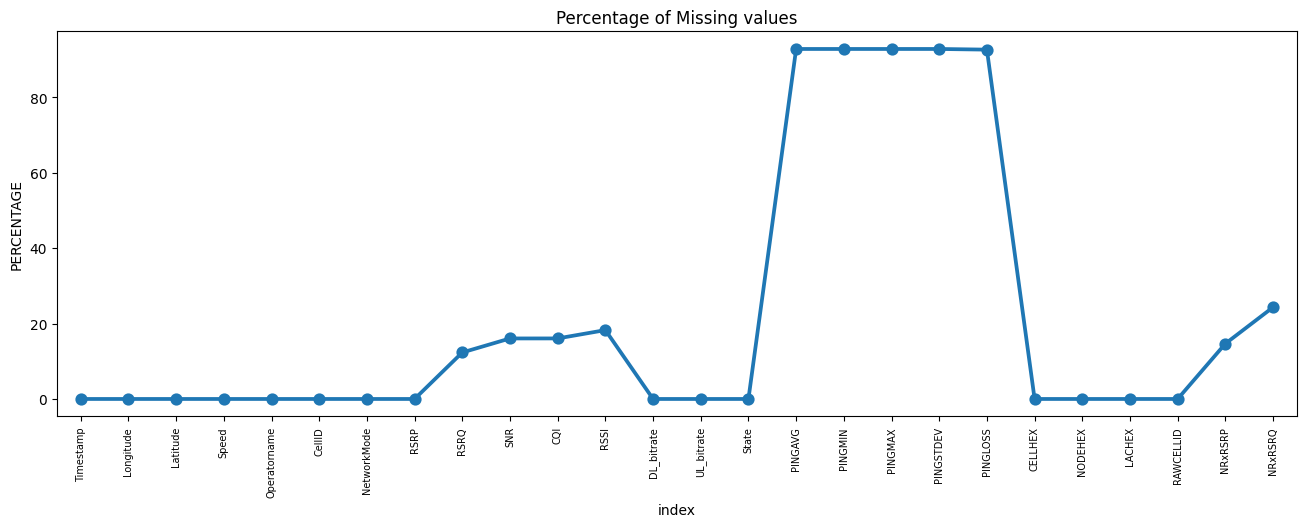

In [9]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

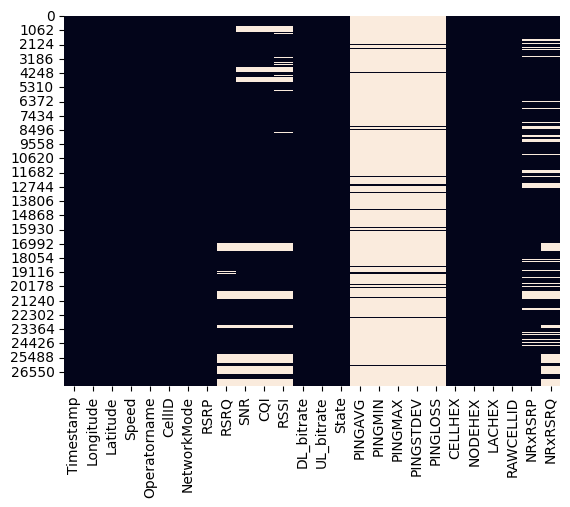

In [10]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Check percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

PINGAVG         92.802001
PINGSTDEV       92.802001
PINGMAX         92.802001
PINGMIN         92.802001
PINGLOSS        92.628031
NRxRSRQ         24.323149
RSSI            18.259577
CQI             16.052336
SNR             16.048712
NRxRSRP         14.667826
RSRQ            12.330108
RAWCELLID        0.000000
LACHEX           0.000000
NODEHEX          0.000000
CELLHEX          0.000000
Timestamp        0.000000
State            0.000000
Longitude        0.000000
DL_bitrate       0.000000
RSRP             0.000000
NetworkMode      0.000000
CellID           0.000000
Operatorname     0.000000
Speed            0.000000
Latitude         0.000000
UL_bitrate       0.000000
dtype: float64

In [12]:

## dropping the column
df.drop(["PINGAVG", "PINGSTDEV", "PINGMAX", "PINGMIN", "PINGLOSS","Timestamp", "Operatorname"], axis=1, inplace=True)

In [13]:
df.head()

,Longitude,Latitude,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,-8.388186,51.935604,0,12,5G,-99,-15.0,6.0,12.0,-90.0,7,1,D,C,A81B,9CBA,11016972,-100.0,-15.0
1,-8.388470,51.935739,1,12,5G,-99,-15.0,6.0,12.0,-90.0,7,1,D,C,A81B,9CBA,11016972,-100.0,-15.0
2,-8.388470,51.935739,1,12,5G,-99,-15.0,6.0,12.0,-90.0,0,0,D,C,A81B,9CBA,11016972,-100.0,-15.0
3,-8.388470,51.935739,1,12,5G,-102,-14.0,6.0,12.0,-90.0,0,0,D,C,A81B,9CBA,11016972,-99.0,-15.0
4,-8.388470,51.935739,1,12,5G,-102,-14.0,6.0,12.0,-90.0,9,12,D,C,A81B,9CBA,11016972,-99.0,-15.0


In [14]:
df["NetworkMode"].value_counts().to_dict()

{'5G': 13959, 'LTE': 9204, 'HSPA+': 4338, 'HSDPA': 41, 'HSUPA': 41, 'UMTS': 8}

In [15]:
df["BandWidth"] = df["NetworkMode"].replace({'5G': 1000000, 'LTE': 500000, 'HSPA+': 200000, 'HSDPA': 200000, 'HSUPA': 100000, 'UMTS': 100000})

C:\Users\Devikamallikarjun\AppData\Local\Temp\ipykernel_9800\742639823.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["BandWidth"] = df["NetworkMode"].replace({'5G': 1000000, 'LTE': 500000, 'HSPA+': 200000, 'HSDPA': 200000, 'HSUPA': 100000, 'UMTS': 100000})


In [16]:
df["BandWidth"].value_counts().to_dict()

{1000000: 13959, 500000: 9204, 200000: 4379, 100000: 49}

In [17]:
df["BandWidth"] = df["BandWidth"].replace({'5G pro': 5, '5G lite': 4, '5G': 3, 'LTE': 2}).astype(int)

In [18]:
df["BandWidth"].value_counts().to_dict()

{1000000: 13959, 500000: 9204, 200000: 4379, 100000: 49}

In [19]:
df["State"].value_counts().to_dict()

{'D': 26751, 'VD': 629, 'I': 203, 'V': 8}

In [20]:
df["State"] = df["State"].replace({'D': 0, 'VD': 1, 'I': 2, 'V': 3}).astype(float)

C:\Users\Devikamallikarjun\AppData\Local\Temp\ipykernel_9800\4157480436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["State"] = df["State"].replace({'D': 0, 'VD': 1, 'I': 2, 'V': 3}).astype(float)


In [21]:
df["LACHEX"].value_counts().to_dict()

{'9CBA': 23143, '75AA': 4427, '0': 14, '75A9': 4, '9CB9': 3}

In [22]:
df["LACHEX"] = df["LACHEX"].replace({'9CBA': 1, '75AA': 2, '0': 0, '75A9': 3, '9CB9': 4}).astype(float)

C:\Users\Devikamallikarjun\AppData\Local\Temp\ipykernel_9800\2780104211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["LACHEX"] = df["LACHEX"].replace({'9CBA': 1, '75AA': 2, '0': 0, '75A9': 3, '9CB9': 4}).astype(float)


In [23]:
df["NODEHEX"].value_counts().to_dict()

{'A81B': 4755,
 '12D': 3124,
 '432AE': 2639,
 'A709': 1563,
 'A4EF': 1524,
 'A4DF': 1442,
 'A99B': 1439,
 'A4E8': 1162,
 'C': 1124,
 'A9AA': 943,
 '5A68E': 858,
 '542F2': 775,
 'A701': 732,
 'A992': 700,
 '53BEA': 596,
 '6157E': 451,
 'A9B0': 419,
 'A710': 408,
 '76C6C': 325,
 '53B22': 280,
 'A707': 279,
 '438EE': 205,
 'A705': 202,
 'A995': 172,
 '5328A': 152,
 '53C4E': 147,
 'A700': 121,
 '5A6F2': 121,
 'A706': 110,
 '534E2': 102,
 '5A5BC': 97,
 '5A81E': 88,
 '36536': 87,
 '43300': 69,
 '363A6': 69,
 'A99D': 60,
 '5AC06': 51,
 'A9C9': 46,
 '532EE': 33,
 '613EE': 28,
 'AACF': 24,
 'A9B6': 22,
 '540FE': 12,
 'AAB6': 9,
 '5A7BA': 5,
 '53802': 4,
 '12D29': 4,
 '12D77': 4,
 'A515': 3,
 '12DA0': 3,
 'A4': 1,
 'CCB': 1,
 'CE1': 1}

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["NODEHEX"] = le.fit_transform(df["NODEHEX"]).astype(float)

In [25]:
df["NODEHEX"].value_counts().to_dict()

{39.0: 4755,
 0.0: 3124,
 6.0: 2639,
 37.0: 1563,
 30.0: 1524,
 28.0: 1442,
 42.0: 1439,
 29.0: 1162,
 50.0: 1124,
 44.0: 943,
 19.0: 858,
 17.0: 775,
 33.0: 732,
 40.0: 700,
 14.0: 596,
 25.0: 451,
 45.0: 419,
 38.0: 408,
 26.0: 325,
 13.0: 280,
 36.0: 279,
 8.0: 205,
 34.0: 202,
 41.0: 172,
 9.0: 152,
 15.0: 147,
 32.0: 121,
 20.0: 121,
 35.0: 110,
 11.0: 102,
 18.0: 97,
 22.0: 88,
 5.0: 87,
 7.0: 69,
 4.0: 69,
 43.0: 60,
 23.0: 51,
 47.0: 46,
 10.0: 33,
 24.0: 28,
 49.0: 24,
 46.0: 22,
 16.0: 12,
 48.0: 9,
 21.0: 5,
 12.0: 4,
 1.0: 4,
 2.0: 4,
 31.0: 3,
 3.0: 3,
 27.0: 1,
 51.0: 1,
 52.0: 1}

In [26]:
df["CELLHEX"].value_counts().to_dict()

{'D': 5868,
 '2': 5571,
 'C': 4153,
 'B': 3936,
 '3': 2410,
 '1': 1322,
 'A029': 997,
 '2909': 912,
 'E13F': 632,
 '9EF9': 581,
 'CB8A': 433,
 '9EF3': 360,
 '29C4': 111,
 '9EFF': 103,
 '5': 43,
 '290A': 43,
 'E13D': 41,
 '4': 26,
 '5209': 17,
 'E142': 15,
 '29': 7,
 'EBB': 3,
 'A': 2,
 'C4': 2,
 '3F': 1,
 '87': 1,
 'DF0B': 1}

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["CELLHEX"] = le.fit_transform(df["CELLHEX"]).astype(float)

In [28]:
df["CELLHEX"].value_counts().to_dict()

{21.0: 5868,
 1.0: 5571,
 18.0: 4153,
 17.0: 3936,
 6.0: 2410,
 0.0: 1322,
 16.0: 997,
 3.0: 912,
 24.0: 632,
 13.0: 581,
 20.0: 433,
 12.0: 360,
 5.0: 111,
 14.0: 103,
 9.0: 43,
 4.0: 43,
 23.0: 41,
 8.0: 26,
 10.0: 17,
 25.0: 15,
 2.0: 7,
 26.0: 3,
 15.0: 2,
 19.0: 2,
 7.0: 1,
 11.0: 1,
 22.0: 1}

In [29]:
df.head()

,Longitude,Latitude,Speed,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ,BandWidth
0,-8.388186,51.935604,0,12,5G,-99,-15.0,6.0,12.0,-90.0,7,1,0.0,18.0,39.0,1.0,11016972,-100.0,-15.0,1000000
1,-8.388470,51.935739,1,12,5G,-99,-15.0,6.0,12.0,-90.0,7,1,0.0,18.0,39.0,1.0,11016972,-100.0,-15.0,1000000
2,-8.388470,51.935739,1,12,5G,-99,-15.0,6.0,12.0,-90.0,0,0,0.0,18.0,39.0,1.0,11016972,-100.0,-15.0,1000000
3,-8.388470,51.935739,1,12,5G,-102,-14.0,6.0,12.0,-90.0,0,0,0.0,18.0,39.0,1.0,11016972,-99.0,-15.0,1000000
4,-8.388470,51.935739,1,12,5G,-102,-14.0,6.0,12.0,-90.0,9,12,0.0,18.0,39.0,1.0,11016972,-99.0,-15.0,1000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Longitude    27591 non-null  float64
 1   Latitude     27591 non-null  float64
 2   Speed        27591 non-null  int64  
 3   CellID       27591 non-null  int64  
 4   NetworkMode  27591 non-null  object 
 5   RSRP         27591 non-null  int64  
 6   RSRQ         24189 non-null  float64
 7   SNR          23163 non-null  float64
 8   CQI          23162 non-null  float64
 9   RSSI         22553 non-null  float64
 10  DL_bitrate   27591 non-null  int64  
 11  UL_bitrate   27591 non-null  int64  
 12  State        27591 non-null  float64
 13  CELLHEX      27591 non-null  float64
 14  NODEHEX      27591 non-null  float64
 15  LACHEX       27591 non-null  float64
 16  RAWCELLID    27591 non-null  int64  
 17  NRxRSRP      23544 non-null  float64
 18  NRxRSRQ      20880 non-null  float64
 19  Band

In [31]:
df["RSRQ"].median()

-12.0

In [32]:
df["RSRQ"].mode()

0   -12.0
Name: RSRQ, dtype: float64

In [33]:
df["RSRQ"].fillna(df["RSRQ"].median(), inplace=True)

C:\Users\Devikamallikarjun\AppData\Local\Temp\ipykernel_9800\3473502383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RSRQ"].fillna(df["RSRQ"].median(), inplace=True)


In [34]:
# First apply forward fill, then backward fill for any remaining missing values
df.ffill(inplace=True)
df.bfill(inplace=True)

In [35]:
df.isna().sum()

Longitude      0
Latitude       0
Speed          0
CellID         0
NetworkMode    0
RSRP           0
RSRQ           0
SNR            0
CQI            0
RSSI           0
DL_bitrate     0
UL_bitrate     0
State          0
CELLHEX        0
NODEHEX        0
LACHEX         0
RAWCELLID      0
NRxRSRP        0
NRxRSRQ        0
BandWidth      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Longitude    27591 non-null  float64
 1   Latitude     27591 non-null  float64
 2   Speed        27591 non-null  int64  
 3   CellID       27591 non-null  int64  
 4   NetworkMode  27591 non-null  object 
 5   RSRP         27591 non-null  int64  
 6   RSRQ         27591 non-null  float64
 7   SNR          27591 non-null  float64
 8   CQI          27591 non-null  float64
 9   RSSI         27591 non-null  float64
 10  DL_bitrate   27591 non-null  int64  
 11  UL_bitrate   27591 non-null  int64  
 12  State        27591 non-null  float64
 13  CELLHEX      27591 non-null  float64
 14  NODEHEX      27591 non-null  float64
 15  LACHEX       27591 non-null  float64
 16  RAWCELLID    27591 non-null  int64  
 17  NRxRSRP      27591 non-null  float64
 18  NRxRSRQ      27591 non-null  float64
 19  Band

In [37]:
df.drop("NetworkMode", axis=1, inplace = True)

In [38]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitude   27591 non-null  float64
 1   Latitude    27591 non-null  float64
 2   Speed       27591 non-null  int64  
 3   CellID      27591 non-null  int64  
 4   RSRP        27591 non-null  int64  
 5   RSRQ        27591 non-null  float64
 6   SNR         27591 non-null  float64
 7   CQI         27591 non-null  float64
 8   RSSI        27591 non-null  float64
 9   DL_bitrate  27591 non-null  int64  
 10  UL_bitrate  27591 non-null  int64  
 11  State       27591 non-null  float64
 12  CELLHEX     27591 non-null  float64
 13  NODEHEX     27591 non-null  float64
 14  LACHEX      27591 non-null  float64
 15  RAWCELLID   27591 non-null  int64  
 16  NRxRSRP     27591 non-null  float64
 17  NRxRSRQ     27591 non-null  float64
 18  BandWidth   27591 non-null  int32  
dtypes: float64(12), int32(1),

In [40]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

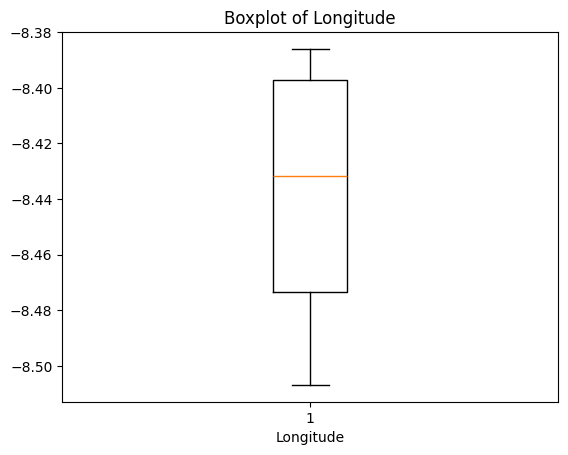

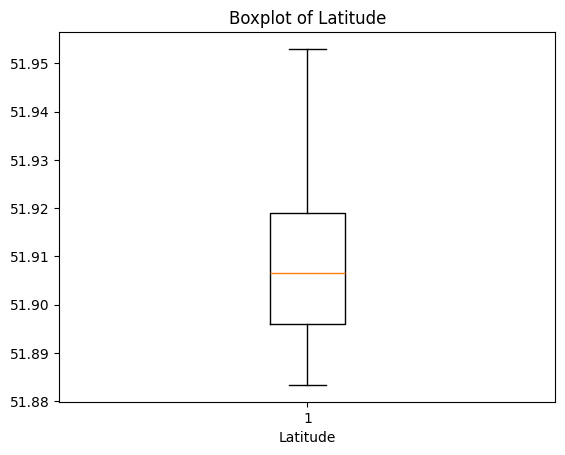

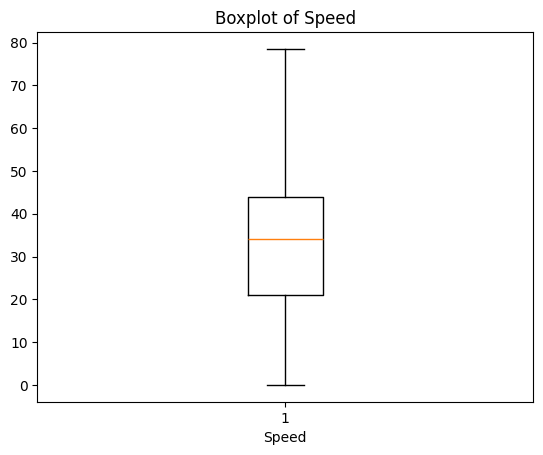

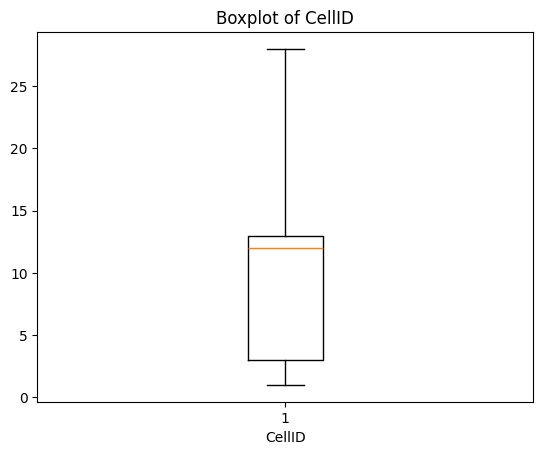

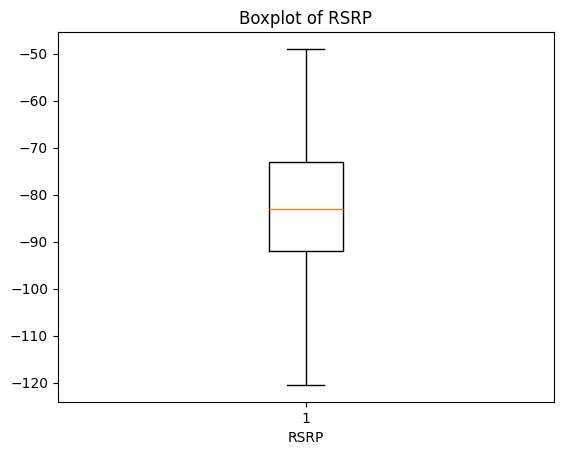

In [41]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns[:5]:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

In [42]:
## plot the Correlation matrix
#plt.figure(figsize=(60,30))
#correlation=df.corr()
#sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [43]:
df.head(2)

,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ,BandWidth
0,-8.388186,51.935604,0.0,12,-99.0,-15.0,6.0,12.0,-90.0,7,1.0,0.0,18.0,39.0,1.0,11016972,-100.0,-15.0,1000000
1,-8.388470,51.935739,1.0,12,-99.0,-15.0,6.0,12.0,-90.0,7,1.0,0.0,18.0,39.0,1.0,11016972,-100.0,-15.0,1000000


In [44]:
x = df.drop('BandWidth', axis=1)
y = df['BandWidth']

In [45]:
y.value_counts().to_dict()

{1000000: 13959, 500000: 9204, 200000: 4379, 100000: 49}

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x, y = sm.fit_resample(x, y)

c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39085, 18), (16751, 18), (39085,), (16751,))

### **Model Training**

### **Stacking Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,accuracy_score

# Base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('adb', AdaBoostClassifier(random_state=42))
]

# Meta classifier
meta_classifier = LogisticRegression(random_state=42)

# Stacking classifier
STC = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train stacking classifier
STC.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('adb', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [49]:
y_pred = STC.predict(x_train)
acc_stc = accuracy_score(y_train, y_pred) * 100
pre_stc = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 99.99744147371115%
Precision : 99.99744167007776%
Recall : 99.9974414082489%
F1 Score : 99.99744140824221%


In [50]:
y_pred = STC.predict(x_test)
acc_stc = accuracy_score(y_test, y_pred) * 100
pre_stc = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 99.96418124291087%
Precision : 99.96419762863415%
Recall : 99.96418338108883%
F1 Score : 99.96418551684167%


<Axes: >

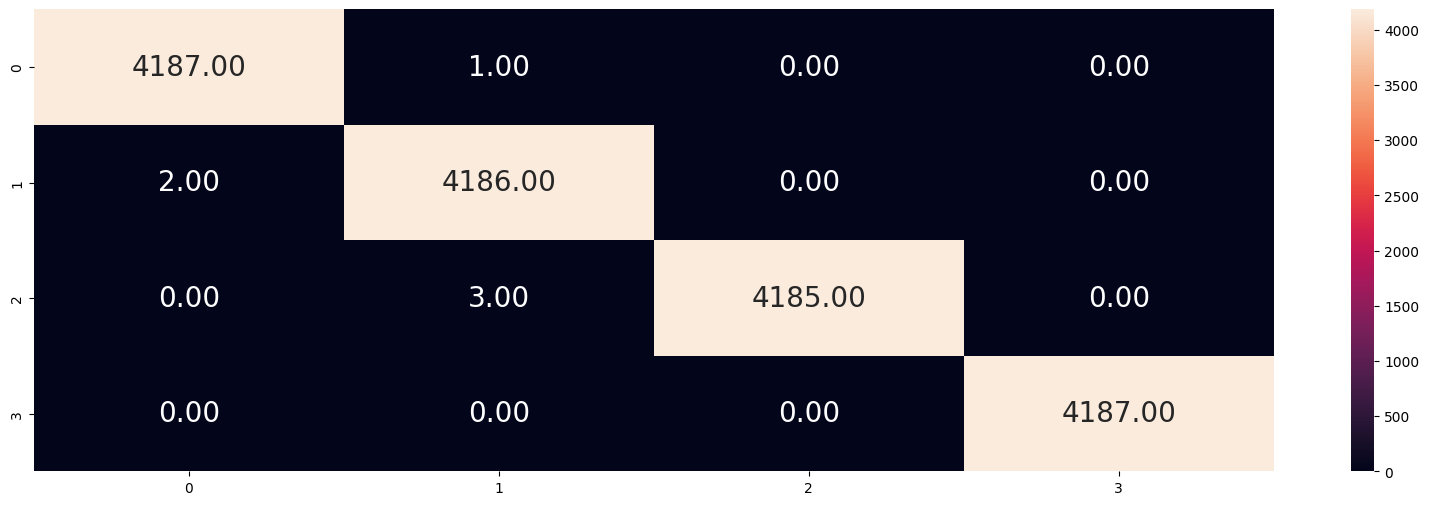

In [51]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

### **Voting classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Define the individual classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = AdaBoostClassifier(n_estimators=50, random_state=42)
clf3 = LogisticRegression(random_state=42)

# Create a VotingClassifier with 'soft' voting
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2), ('svc', clf3)], voting='soft')

# Train the VotingClassifier
voting_clf.fit(x_train, y_train)

c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', DecisionTreeClassifier(random_state=42)),
                             ('gb', AdaBoostClassifier(random_state=42)),
                             ('svc', LogisticRegression(random_state=42))],
                 voting='soft')

In [53]:
y_pred = voting_clf.predict(x_train)
acc_vtc = accuracy_score(y_train, y_pred) * 100
pre_vtc = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_vtc = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_vtc = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_vtc}%")
print(f"Precision : {pre_vtc}%")
print(f"Recall : {recall_vtc}%")
print(f"F1 Score : {f1_vtc}%")

Accuracy: 99.99744147371115%
Precision : 99.99744167007776%
Recall : 99.9974414082489%
F1 Score : 99.99744140824221%


In [54]:
y_pred = voting_clf.predict(x_test)
acc_vtc = accuracy_score(y_test, y_pred) * 100
pre_vtc = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_vtc = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_vtc = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_vtc}%")
print(f"Precision : {pre_vtc}%")
print(f"Recall : {recall_vtc}%")
print(f"F1 Score : {f1_vtc}%")

Accuracy: 99.90448331442899%
Precision : 99.90453873913447%
Recall : 99.90448901623688%
F1 Score : 99.90449040383113%


<Axes: >

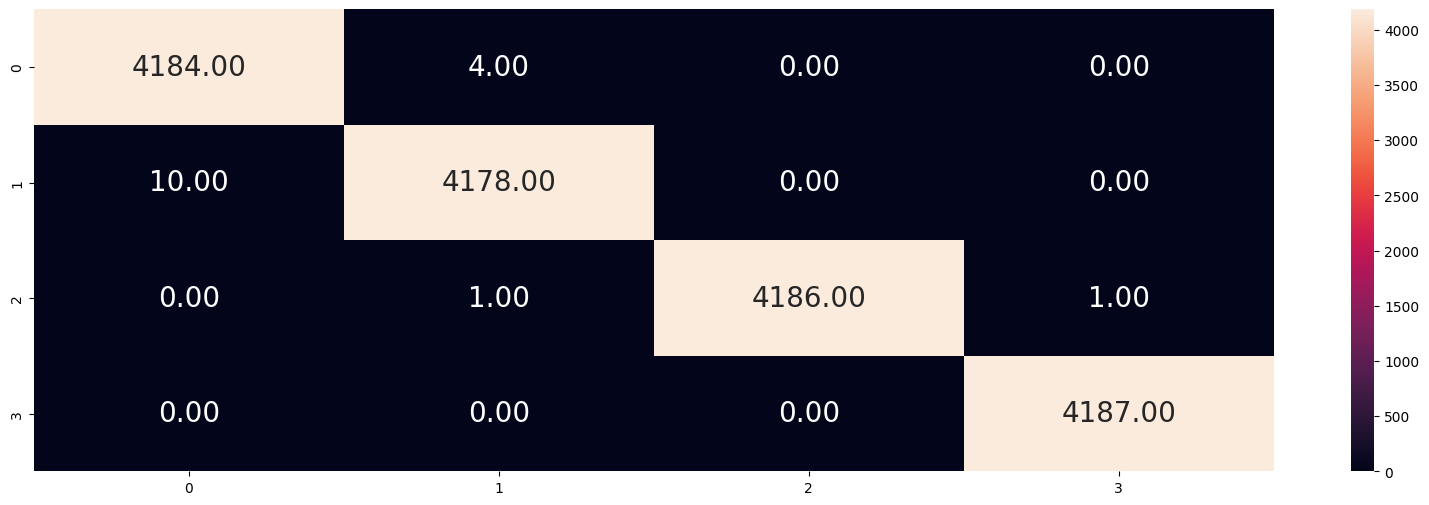

In [55]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

#### **CNN**

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Reshape data to fit the format required by CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn = Sequential([
    Conv1D(32, 1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 1, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Softmax for multiclass classification
])

# Compile the model for multiclass classification
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for multiclass classification
              metrics=['accuracy'])  # Accuracy as a metric

# Train the model
cnn.fit(X_train, y_train_encoded, epochs=10, batch_size=128, validation_data=(X_test, y_test_encoded))

c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7401 - loss: 0.6562 - val_accuracy: 0.9721 - val_loss: 0.1080
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1112 - val_accuracy: 0.9819 - val_loss: 0.0513
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0702 - val_accuracy: 0.9869 - val_loss: 0.0386
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0501 - val_accuracy: 0.9919 - val_loss: 0.0338
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0437 - val_accuracy: 0.9900 - val_loss: 0.0265
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 0.9916 - val_loss: 0.0245
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9933 - val_loss: 0.0248
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0298 - val_accuracy: 0.

In [57]:
# Evaluate the model on test data
loss, accuracy = cnn.evaluate(X_train, y_train_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.9972 - loss: 0.0118
Accuracy: 99.70%


In [58]:
# Evaluate the model on test data
loss, accuracy = cnn.evaluate(X_test, y_test_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')

524/524 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9960 - loss: 0.0150
Accuracy: 99.59%


524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step


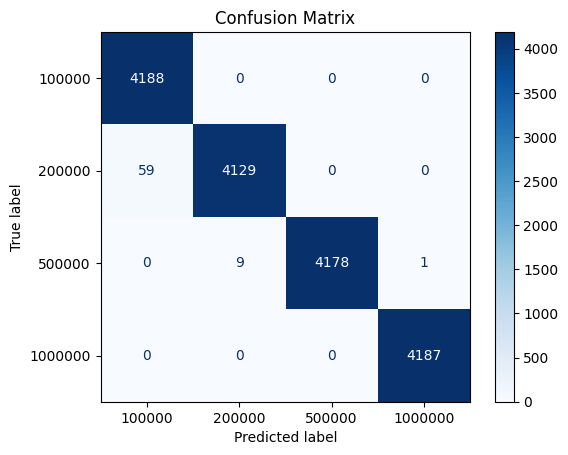

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [60]:
from sklearn.metrics import precision_recall_fscore_support

# Predict on the test set
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_encoded, y_pred_classes, average='weighted')

# Print Recall and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step 
Precision: 0.9959
Recall: 0.9959
F1-Score: 0.9959


## **After K-Best**

In [61]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([1.05409746e+00, 9.96104975e-01, 4.97935907e-01, 1.01568726e+00,
       5.27571193e-01, 5.34612980e-01, 4.92607137e-01, 3.75770668e-01,
       5.99633539e-01, 6.40965590e-01, 6.03196907e-01, 2.45252585e-04,
       1.15095221e+00, 9.47964928e-01, 1.18460366e-03, 1.18166433e+00,
       7.70020403e-01, 4.68047109e-01])

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

RAWCELLID     1.181664
CELLHEX       1.150952
Longitude     1.054097
CellID        1.015687
Latitude      0.996105
NODEHEX       0.947965
NRxRSRP       0.770020
DL_bitrate    0.640966
UL_bitrate    0.603197
RSSI          0.599634
RSRQ          0.534613
RSRP          0.527571
Speed         0.497936
SNR           0.492607
NRxRSRQ       0.468047
CQI           0.375771
LACHEX        0.001185
State         0.000245
dtype: float64

In [63]:
#let's plot the ordered mutual_info values per feature
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [64]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 11 important features
sel_11_cols = SelectKBest(mutual_info_classif, k=12)
sel_11_cols.fit(x_train, y_train)
x_train.columns[sel_11_cols.get_support()]

Index(['Longitude', 'Latitude', 'CellID', 'RSRP', 'RSRQ', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'CELLHEX', 'NODEHEX', 'RAWCELLID', 'NRxRSRP'],
      dtype='object')

In [65]:
x_train = x_train[['Longitude', 'Latitude', 'CellID', 'RSRP', 'RSRQ', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'CELLHEX', 'NODEHEX', 'RAWCELLID', 'NRxRSRP']]

In [66]:
x_test = x_test[['Longitude', 'Latitude', 'CellID', 'RSRP', 'RSRQ', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'CELLHEX', 'NODEHEX', 'RAWCELLID', 'NRxRSRP']]

In [67]:
x_test.head()

,Longitude,Latitude,CellID,RSRP,RSRQ,RSSI,DL_bitrate,UL_bitrate,CELLHEX,NODEHEX,RAWCELLID,NRxRSRP
38107,-8.389736,51.902649,28,-92.591506,-12.0,-113.0,16,0.612741,10.0,0.0,19747337,-51.0
24806,-8.392293,51.931624,13,-92.000000,-11.0,-99.0,9549,80.000000,21.0,39.0,11016973,-93.0
35539,-8.400660,51.916560,28,-90.411256,-3.0,-94.0,0,0.000000,5.0,0.0,19737028,-51.0
24578,-8.420196,51.918741,2,-102.000000,-8.0,-99.0,6222,185.000000,1.0,8.0,70839810,-102.0
20716,-8.386061,51.934271,28,-59.000000,-12.0,-93.0,2107,40.000000,3.0,0.0,19736841,-51.0


In [68]:
y_test.head()

38107     100000
24806    1000000
35539     100000
24578     500000
20716     200000
Name: BandWidth, dtype: int32

In [69]:
# Create a DataFrame with x_test and y_test
data1 = pd.DataFrame(x_test)
data1['y_test'] = y_test

# Save to CSV

data1.to_csv('Test_Data.csv', index=False)

### **Stacking Classifier**

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,accuracy_score

# Base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('adb', AdaBoostClassifier(random_state=42))
]

# Meta classifier
meta_classifier = LogisticRegression(random_state=42)

# Stacking classifier
STC1 = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train stacking classifier
STC1.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('adb', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [71]:
y_pred = STC1.predict(x_train)
acc_stc = accuracy_score(y_train, y_pred) * 100
pre_stc = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 99.99744147371115%
Precision : 99.99744167007776%
Recall : 99.9974414082489%
F1 Score : 99.99744140824221%


In [72]:
y_pred = STC1.predict(x_test)
acc_stc = accuracy_score(y_test, y_pred) * 100
pre_stc = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_stc = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_stc = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_stc}%")
print(f"Precision : {pre_stc}%")
print(f"Recall : {recall_stc}%")
print(f"F1 Score : {f1_stc}%")

Accuracy: 99.97015103575906%
Precision : 99.97016990973289%
Recall : 99.97015281757402%
F1 Score : 99.9701549525615%


<Axes: >

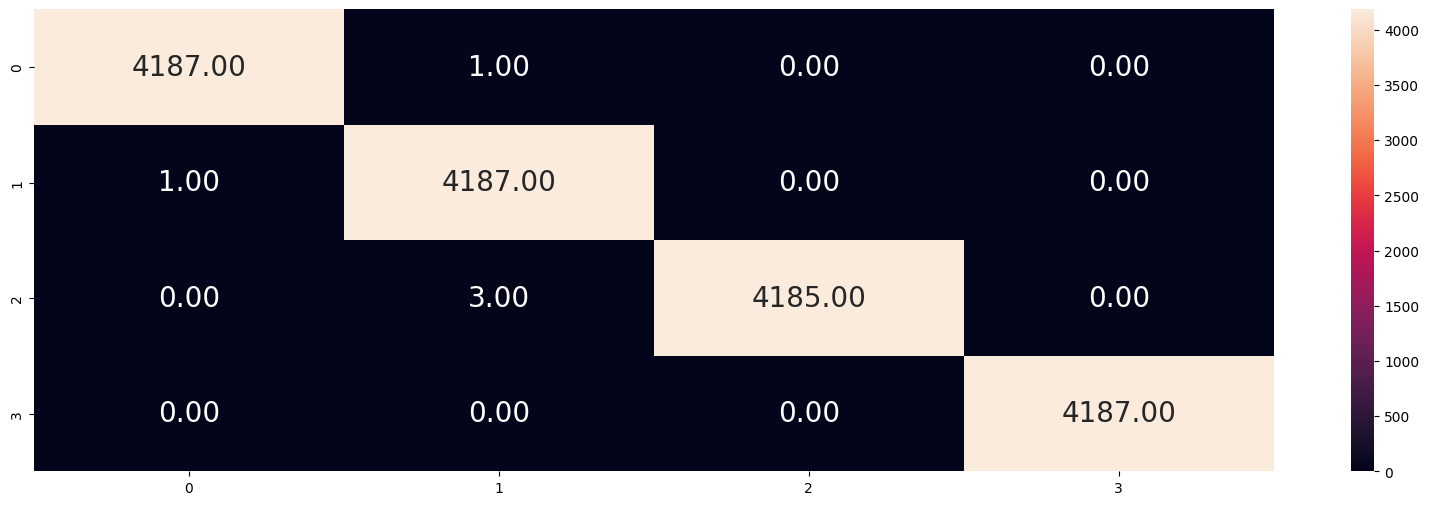

In [73]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

### **Voting Classfier**

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Define the individual classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = AdaBoostClassifier(n_estimators=50, random_state=42)
clf3 = LogisticRegression(random_state=42)

# Create a VotingClassifier with 'soft' voting
voting_clf1 = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2), ('svc', clf3)], voting='soft')

# Train the VotingClassifier
voting_clf1.fit(x_train, y_train)

c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', DecisionTreeClassifier(random_state=42)),
                             ('gb', AdaBoostClassifier(random_state=42)),
                             ('svc', LogisticRegression(random_state=42))],
                 voting='soft')

In [75]:
y_pred = voting_clf1.predict(x_train)
acc_vtc = accuracy_score(y_train, y_pred) * 100
pre_vtc = precision_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_vtc = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_vtc = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_vtc}%")
print(f"Precision : {pre_vtc}%")
print(f"Recall : {recall_vtc}%")
print(f"F1 Score : {f1_vtc}%")

Accuracy: 99.99744147371115%
Precision : 99.99744167007776%
Recall : 99.9974414082489%
F1 Score : 99.99744140824221%


In [76]:
y_pred = voting_clf1.predict(x_test)
acc_vtc = accuracy_score(y_test, y_pred) * 100
pre_vtc = precision_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
recall_vtc = recall_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_vtc = f1_score(y_test, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_vtc}%")
print(f"Precision : {pre_vtc}%")
print(f"Recall : {recall_vtc}%")
print(f"F1 Score : {f1_vtc}%")

Accuracy: 99.95821145006268%
Precision : 99.9582267596406%
Recall : 99.95821394460363%
F1 Score : 99.95821536741849%


<Axes: >

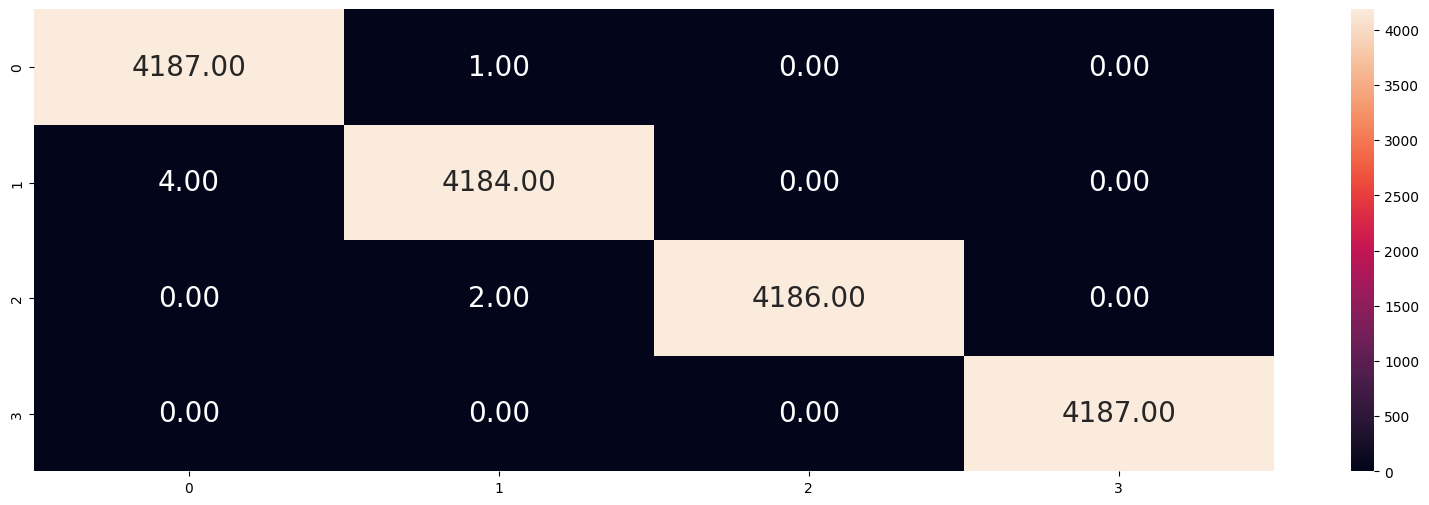

In [77]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,6))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='0.2f',annot_kws={'size':20})

### **CNN**

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Reshape data to fit the format required by CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn = Sequential([
    Conv1D(32, 1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(64, 1, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Softmax for multiclass classification
])

# Compile the model for multiclass classification
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy for multiclass classification
              metrics=['accuracy'])  # Accuracy as a metric

# Train the model
cnn.fit(X_train, y_train_encoded, epochs=10, batch_size=128, validation_data=(X_test, y_test_encoded))




Epoch 1/10


c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7192 - loss: 0.6688 - val_accuracy: 0.9274 - val_loss: 0.1749
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9245 - loss: 0.1792 - val_accuracy: 0.9755 - val_loss: 0.0967
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1047 - val_accuracy: 0.9811 - val_loss: 0.0594
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0690 - val_accuracy: 0.9862 - val_loss: 0.0419
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0498 - val_accuracy: 0.9847 - val_loss: 0.0413
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9936 - val_loss: 0.0333
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0393 - val_accuracy: 0.9928 - val_loss: 0.0285
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9915 - val_

In [79]:
# Evaluate the model on test data
loss, accuracy = cnn.evaluate(X_train, y_train_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9957 - loss: 0.0169
Accuracy: 99.56%


In [80]:
# Evaluate the model on test data
loss, accuracy = cnn.evaluate(X_test, y_test_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')

524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9945 - loss: 0.0215
Accuracy: 99.49%


### **Existing Model**

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
y_pred1 = rf1.predict(x_train)
acc_rf1 = accuracy_score(y_train, y_pred1)
y_pred2 = rf1.predict(x_test)
acc_rf2 = accuracy_score(y_test, y_pred2)
y_pred = voting_clf1.predict(x_train)
 # or 'micro', 'weighted'
recall_rf2 = recall_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
f1_rf2 = f1_score(y_train, y_pred, average='macro') * 100  # or 'micro', 'weighted'
# Print the evaluation metrics
print(f"Accuracy: {acc_vtc}%")
print(f"Precision : {pre_vtc}%")
print(f"Recall : {recall_vtc}%")
print(f"F1 Score : {f1_vtc}%")

print(f'train = {acc_rf1}')
print(f'test = {acc_rf2}')

Accuracy: 99.95821145006268%
Precision : 99.9582267596406%
Recall : 99.95821394460363%
F1 Score : 99.95821536741849%
train = 0.9999744147371115
test = 0.9997612082860725


In [82]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred1 = svm.predict(x_train)
acc_svm1 = accuracy_score(y_train, y_pred1)
y_pred2 = svm.predict(x_test)
acc_svm2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_svm1}')
print(f'test = {acc_svm2}')

train = 0.7156198029934757
test = 0.7148229956420512


In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_train)
acc_lr1 = accuracy_score(y_train, y_pred1)
y_pred2 = lr.predict(x_test)
acc_lr2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_lr1}')
print(f'test = {acc_lr2}')

train = 0.6040936420621722
test = 0.6051579010208346


c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_train)
acc_knn1 = accuracy_score(y_train, y_pred1)
y_pred2 = knn.predict(x_test)
acc_knn2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_knn1}')
print(f'test = {acc_knn2}')

train = 0.9833184085966483
test = 0.9731359321831532


In [85]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_train)
acc_gnb1 = accuracy_score(y_train, y_pred1)
y_pred2 = gnb.predict(x_test)
acc_gnb2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_gnb1}')
print(f'test = {acc_gnb2}')

train = 0.8063707304592554
test = 0.809802399856725


In [86]:
import lightgbm 
from lightgbm import LGBMClassifier
light = LGBMClassifier(force_row_wise=True)
light.fit(x_train, y_train)
y_pred1 = light.predict(x_train)
acc_light1 = accuracy_score(y_train, y_pred1)
y_pred2 = light.predict(x_test)
acc_light2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_light1}')
print(f'test = {acc_light2}')

[LightGBM] [Info] Total Bins 2683
[LightGBM] [Info] Number of data points in the train set: 39085, number of used features: 12
[LightGBM] [Info] Start training from score -1.386320
[LightGBM] [Info] Start training from score -1.386320
[LightGBM] [Info] Start training from score -1.386320
[LightGBM] [Info] Start training from score -1.386218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [87]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred1 = adb.predict(x_train)
acc_adb1 = accuracy_score(y_train, y_pred1)
y_pred2 = adb.predict(x_test)
acc_adb2 = accuracy_score(y_test, y_pred2)

print(f'train = {acc_adb1}')
print(f'test = {acc_adb2}')

train = 0.9821926570295509
test = 0.9823294131693631


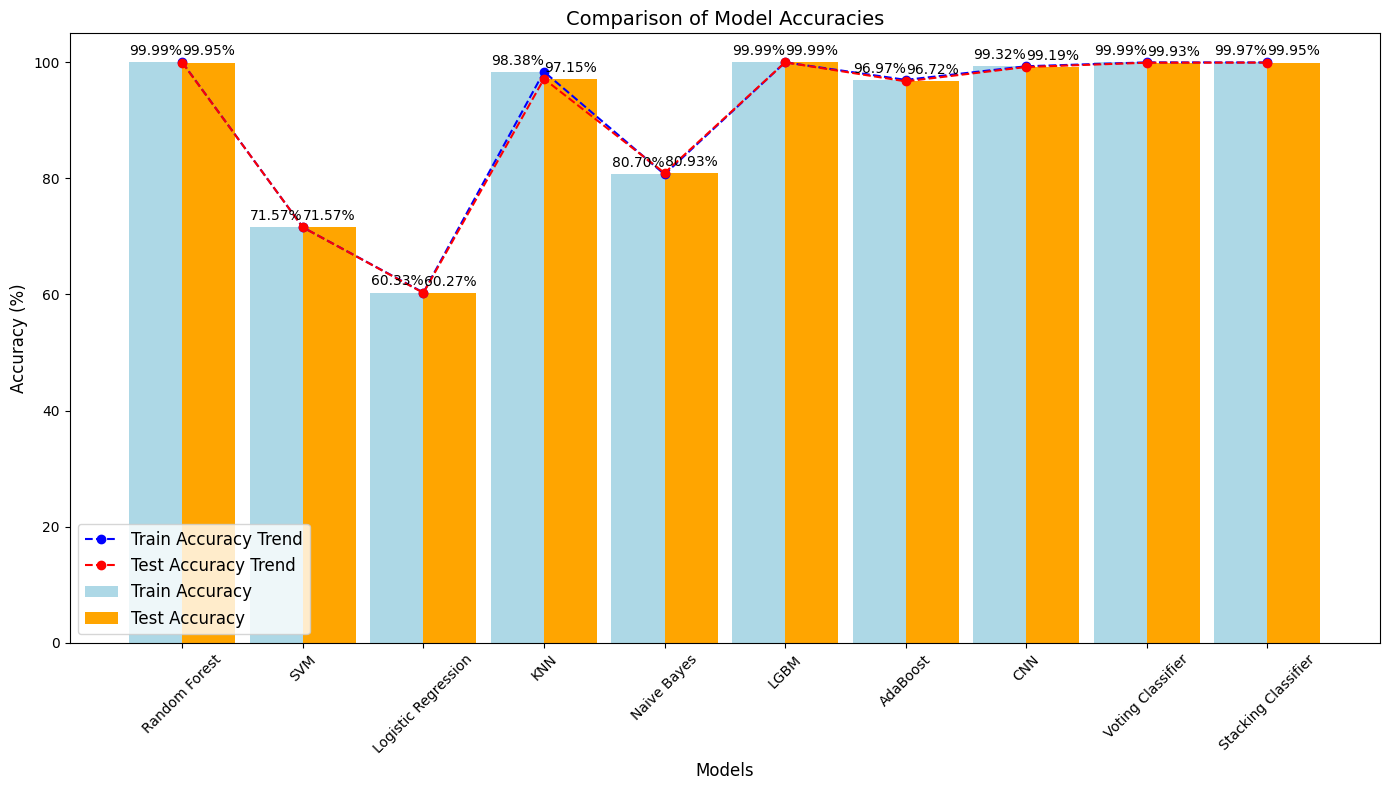

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy values - replace these with real values
acc_rf1, acc_svm1, acc_lr1, acc_knn1, acc_gnb1, acc_light1, acc_adb1, acc_mlp1, acc_vtc1, acc_stc1 = (
   99.99 , 71.57, 60.33, 98.38, 80.70, 99.99, 96.97, 99.32, 99.99, 99.97
)  # Example values
acc_rf2 , acc_svm2 , acc_lr2 , acc_knn2 , acc_gnb2 , acc_light2 , acc_adb2, acc_mlp2 , acc_vtc2 , acc_stc2 =(
99.95 , 71.57, 60.27, 97.15, 80.93, 99.99, 96.72, 99.19, 99.93, 99.95
    )
# Accuracy results from various models
models = [
    'Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Naive Bayes', 'LGBM',
    'AdaBoost', 'CNN', 'Voting Classifier', 'Stacking Classifier'
]
train_acc = [
    acc_rf1 , acc_svm1 , acc_lr1 , acc_knn1 , acc_gnb1 ,
    acc_light1 , acc_adb1, acc_mlp1 , acc_vtc1 , acc_stc1 
]
test_acc = [
    acc_rf2 , acc_svm2 , acc_lr2 , acc_knn2 , acc_gnb2 ,
    acc_light2 , acc_adb2, acc_mlp2 , acc_vtc2 , acc_stc2 
]
# Plot the accuracies
x = np.arange(len(models))  # the label locations
width = 0.44 # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bar plots
bars1 = ax.bar(x - width / 2, train_acc, width, label='Train Accuracy', color='lightblue')
bars2 = ax.bar(x + width / 2, test_acc, width, label='Test Accuracy', color='orange')

# Line graph
ax.plot(x, train_acc, color='blue', marker='o', label='Train Accuracy Trend', linestyle='--', linewidth=1.5)
ax.plot(x, test_acc, color='red', marker='o', label='Test Accuracy Trend', linestyle='--', linewidth=1.5)

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Comparison of Model Accuracies', fontsize=14)
ax.set_xticks(x)

ax.set_xticklabels(models, fontsize=10, rotation=45)
ax.legend(fontsize=12)

# Annotate bars
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset text above bars
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
